In [1]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Load data

Below we load data from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/) to better understand how to use linear regressions.

> The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [2]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In this dataset Sales is the dependent variable (Y), while TV, Radio and Newspaper are indepednent varialbes (X1, X2 and X3 respectively)

>  It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

While our goal as journalists is rarely to instruct clients, we are interested in explaining phenomena. How much of this phenomenon of sales can be explained by the tree predictor variables (X1, X2 and X3) using a linear model? 

Let's find out...once we grasp the basics, we can move on to journalistic applicaitons.

# Exploring the data

From the documentation
> Advertising data sales (in thousands of units) for a particular product and advertising budgets (in thousands of dollars) for TV, radio, and newspaper media

## Summary Stats

In [3]:
advertising.describe().round(1)

,TV,Radio,Newspaper,Sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.3,30.6,14.0
std,85.9,14.8,21.8,5.2
min,0.7,0.0,0.3,1.6
25%,74.4,10.0,12.8,10.4
50%,149.8,22.9,25.8,12.9
75%,218.8,36.5,45.1,17.4
max,296.4,49.6,114.0,27.0


## Plotting the data

Make some plots below to understand this data better

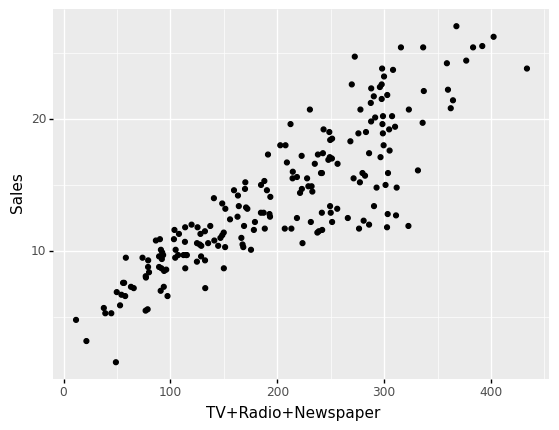

<ggplot: (310914391)>

In [4]:
(
    ggplot(advertising, aes(x='TV+Radio+Newspaper', y='Sales')) +
        geom_point()
)

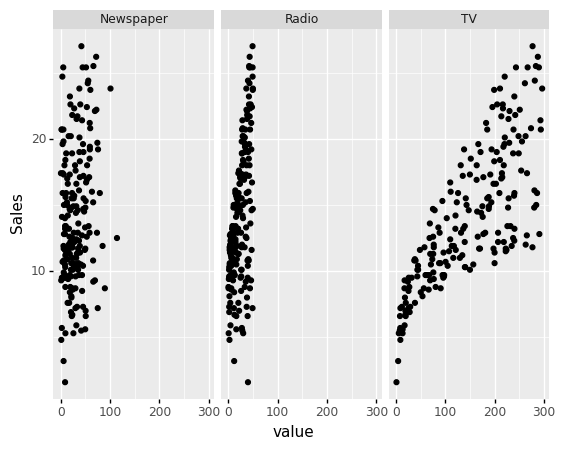

<ggplot: (310989924)>

In [7]:
to_plot = advertising.melt(id_vars='Sales')

(
ggplot(to_plot, aes(x='value', y='Sales'))
 +geom_point()
 +facet_wrap('variable')
)

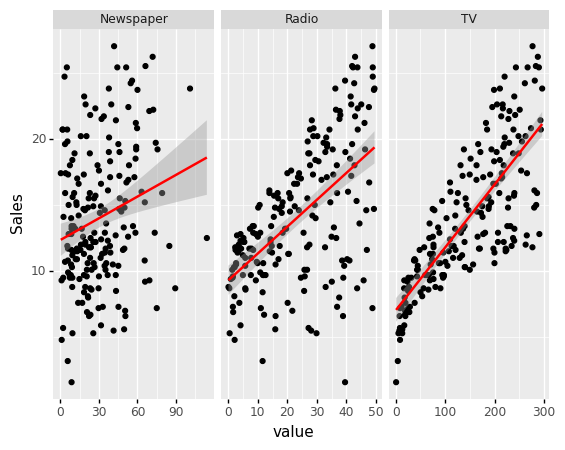

<ggplot: (311520365)>

In [12]:
(
ggplot(to_plot, aes(x='value', y='Sales'))
 +geom_point() + geom_smooth(method='lm', color='red')
 +facet_wrap('variable', scales='free_x')
)

### Observations
* hard stop for radio at 50
* newspapers end up stopping a little after 100 
* newspaper has less of a clear coorelation (there is a positive coorelation but not much) 
* notice error changes with tv (it cones/fans out)

## Remember you always want to plot the distributions of each value

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 21'. Pick better value with 'binwidth'.


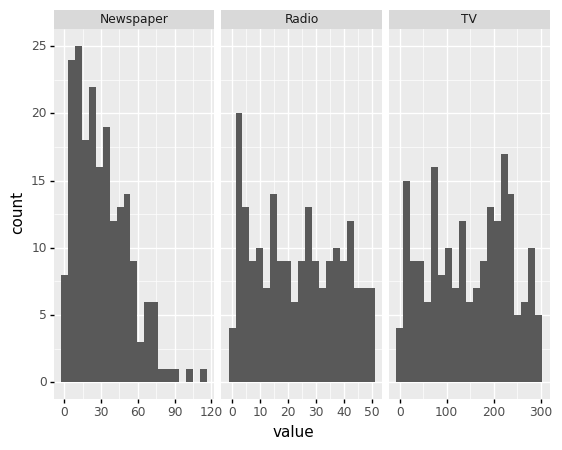

<ggplot: (311599855)>

In [18]:
(
ggplot(to_plot, aes(x='value'))
 +geom_histogram() 
 +facet_wrap('variable', scales='free_x')
)

# Regression models

Run some regression models in the cells below to better understand this data

In [5]:
import statsmodels.formula.api as smf

model = smf.ols("Sales ~ TV", data=advertising)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        13:19:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What have we learned about the relationship between advertising and sales of this product? 👉 
(answer in the cell below)